<a href="https://colab.research.google.com/github/anamacam/machine_learning/blob/master/Agricola2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, kendalltau, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [6]:
# Carcar archivo BasePagina
df = pd.read_excel('Base agrícola 2019 - 2023.xlsx', sheet_name='BasePagina')

In [31]:
df.head()

,Código Dane departamento,Departamento,Código Dane municipio,Municipio,Desagregación cultivo,Cultivo,Ciclo del cultivo,Grupo cultivo,Subgrupo,Año,Periodo,Área sembrada (ha),Área cosechada (ha),Producción (t),Rendimiento (t/ha),Nombre científico del cultivo,Código del cultivo,Estado físico del cultivo
0,5,Antioquia,5001,Medellín,Aguacate demás variedades,Aguacate,Permanente,Frutales,Demás frutales,2019,2019,24.00,23.00,138.00,6.0,Persea americana,2040299,En fresco
1,5,Antioquia,5001,Medellín,Aguacate demás variedades,Aguacate,Permanente,Frutales,Demás frutales,2020,2020,8.52,3.52,21.12,6.0,Persea americana,2040299,En fresco
2,5,Antioquia,5001,Medellín,Aguacate demás variedades,Aguacate,Permanente,Frutales,Demás frutales,2021,2021,8.52,4.52,27.12,6.0,Persea americana,2040299,En fresco
3,5,Antioquia,5001,Medellín,Aguacate demás variedades,Aguacate,Permanente,Frutales,Demás frutales,2022,2022,17.17,8.52,51.12,6.0,Persea americana,2040299,En fresco
4,5,Antioquia,5001,Medellín,Aguacate demás variedades,Aguacate,Permanente,Frutales,Demás frutales,2023,2023,14.97,8.52,51.12,6.0,Persea americana,2040299,En fresco


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115572 entries, 0 to 115571
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Código Dane departamento       115572 non-null  int64  
 1   Departamento                   115572 non-null  object 
 2   Código Dane municipio          115572 non-null  int64  
 3   Municipio                      115572 non-null  object 
 4   Desagregación cultivo          115572 non-null  object 
 5   Cultivo                        115572 non-null  object 
 6   Ciclo del cultivo              115572 non-null  object 
 7   Grupo cultivo                  115572 non-null  object 
 8   Subgrupo                       115572 non-null  object 
 9   Año                            115572 non-null  int64  
 10  Periodo                        115572 non-null  object 
 11  Área sembrada (ha)             115572 non-null  float64
 12  Área cosechada (ha)           

limpieza de datos

In [34]:
df['Área sembrada (ha)']= pd.to_numeric(df['Área sembrada (ha)'], errors='coerce')
df['Área cosechada (ha)']= pd.to_numeric(df['Área cosechada (ha)'], errors='coerce')
df['Producción (t)']= pd.to_numeric(df['Producción (t)'], errors='coerce')
df['Rendimiento (t/ha)']= pd.to_numeric(df['Rendimiento (t/ha)'], errors='coerce')

In [36]:
nulos_col = df.isnull().sum()
nulos_col

,0
Código Dane departamento,0
Departamento,0
Código Dane municipio,0
Municipio,0
Desagregación cultivo,0
Cultivo,0
Ciclo del cultivo,0
Grupo cultivo,0
Subgrupo,0
Año,0


In [37]:
df['Cultivo'].value_counts()

,count
Cultivo,
Maíz,14983
Yuca,6974
Frijol,6774
Tomate,5007
Plátano,4005
...,...
Otras raíces y tubérculos,3
Olivo,3
Carambolo,3


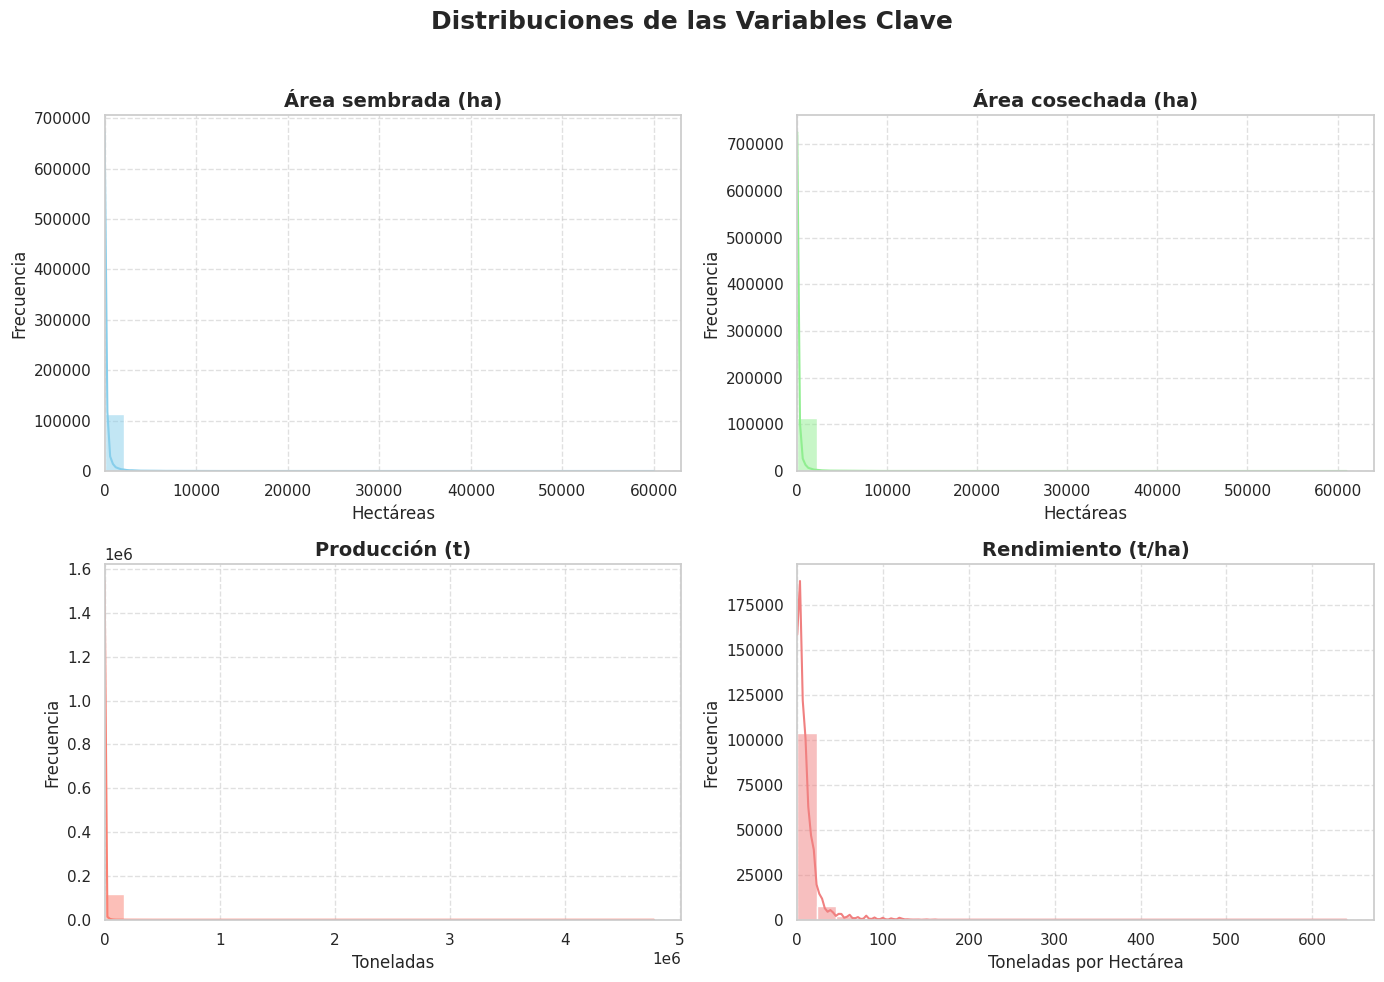

In [10]:
def plot_histograms(df):
    # Establecer el estilo de Seaborn
    sns.set(style='whitegrid')

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Distribuciones de las Variables Clave', fontsize=18, fontweight='bold')

    # Personalizar cada histograma con colores y títulos
    hist_data = [
        ('Área sembrada (ha)', 'Hectáreas', "skyblue"),
        ('Área cosechada (ha)', 'Hectáreas', "lightgreen"),
        ('Producción (t)', 'Toneladas', "salmon"),
        ('Rendimiento (t/ha)', 'Toneladas por Hectárea', "lightcoral")
    ]

    for ax, (col, xlabel, color) in zip(axes.flatten(), hist_data):
        sns.histplot(df[col], bins=28, kde=True, color=color, ax=ax)
        ax.set_title(col, fontsize=14, fontweight='bold')
        ax.set_xlabel(xlabel, fontsize=12)
        ax.set_ylabel("Frecuencia", fontsize=12)
        ax.set_xlim(left=0)
        ax.set_ylim(bottom=0)
        ax.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Llamar a la funció non mejorada
plot_histograms(df)

1. Área sembrada (ha): El gráfico en la parte superior izquierda muestra que la mayoría de las áreas sembradas se concentran en un rango pequeño de hectáreas (por debajo de las 10,000), y hay muy pocas instancias con grandes áreas sembradas (hasta 60,000 hectáreas).

2. Área cosechada (ha): El gráfico en la parte superior derecha indica una tendencia similar al área sembrada. La mayor parte de los cultivos cosechados provienen de áreas pequeñas, y se observa una disminución drástica en la frecuencia a medida que aumentan las hectáreas cosechadas.

3. Producción (t): En la parte inferior izquierda, la distribución de la producción en toneladas sigue una tendencia sesgada hacia la izquierda, con la mayoría de los cultivos produciendo pocas toneladas y algunos pocos con una producción mucho mayor (hasta 5 millones de toneladas).

4. Rendimiento (t/ha): En la parte inferior derecha, el rendimiento (toneladas por hectárea) sigue una distribución que muestra un gran número de observaciones con un bajo rendimiento por hectárea, y pocas instancias con un rendimiento superior.

In [38]:
df['Departamento'].value_counts()

,count
Departamento,
Boyacá,12265
Cundinamarca,10831
Antioquia,10652
Santander,9010
Huila,8290
Nariño,7931
Valle del Cauca,7465
Cauca,5188
Norte de Santander,4957


In [40]:
df['Producción (t)'].value_counts()

,count
Producción (t),
0.000,3572
30.000,1302
60.000,1295
20.000,1190
12.000,1031
...,...
404.750,1
402.250,1
394.750,1


In [42]:
df['Año'].value_counts()

,count
Año,
2023,24919
2022,24808
2021,23898
2020,21511
2019,20436


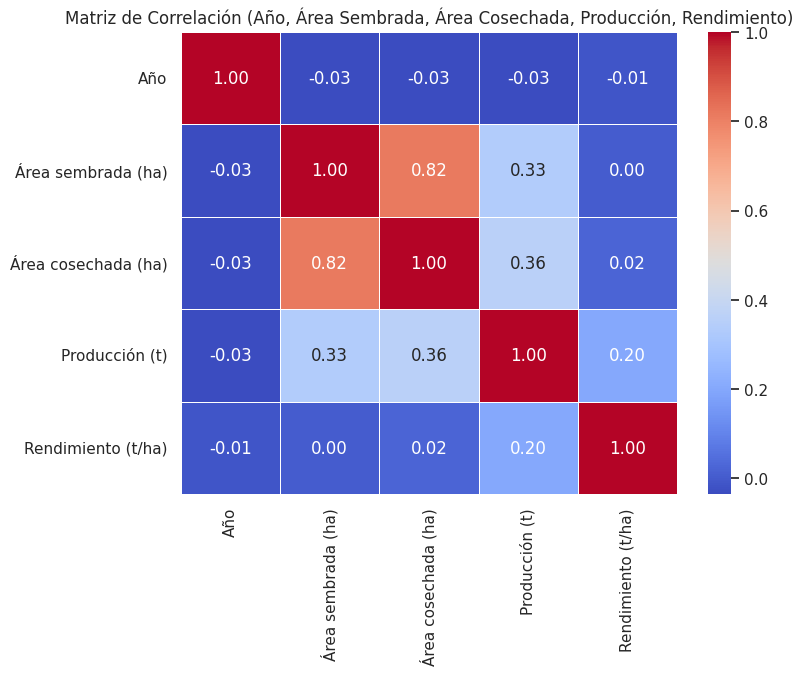

In [110]:
# Matriz de correlación solo para año, area sembrada, area cosecchada, produccion y rendimiento
correlation_columns = ['Año', 'Área sembrada (ha)', 'Área cosechada (ha)', 'Producción (t)', 'Rendimiento (t/ha)']
correlation_matrix = df[correlation_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Matriz de Correlación (Año, Área Sembrada, Área Cosechada, Producción, Rendimiento)')
plt.show()

In [65]:
# Identificación de valores atípicos
def identify_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)].index.tolist()
    return outliers

In [66]:
# Identificar y manejar valores atípicos
outliers_area_sembrada = identify_outliers_iqr(df['Área sembrada (ha)'])
outliers_area_cosechada = identify_outliers_iqr(df['Área cosechada (ha)'])
outliers_produccion = identify_outliers_iqr(df['Producción (t)'])
outliers_rendimiento = identify_outliers_iqr(df['Rendimiento (t/ha)'])

In [67]:
# Reemplazo de valores atípicos por la mediana
if outliers_area_sembrada:
    df.loc[outliers_area_sembrada, 'Área sembrada (ha)'] = df['Área sembrada (ha)'].median()
if outliers_area_cosechada:
    df.loc[outliers_area_cosechada, 'Área cosechada (ha)'] = df['Área cosechada (ha)'].median()
if outliers_produccion:
    df.loc[outliers_produccion, 'Producción (t)'] = df['Producción (t)'].median()
if outliers_rendimiento:
    df.loc[outliers_rendimiento, 'Rendimiento (t/ha)'] = df['Rendimiento (t/ha)'].median()

In [68]:
# Regresión lineal para analizar tendencia
x = df['Año'].values.reshape(-1, 1)
y = df['Producción (t)'].values

In [90]:
# Validación del modelo de regresión

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

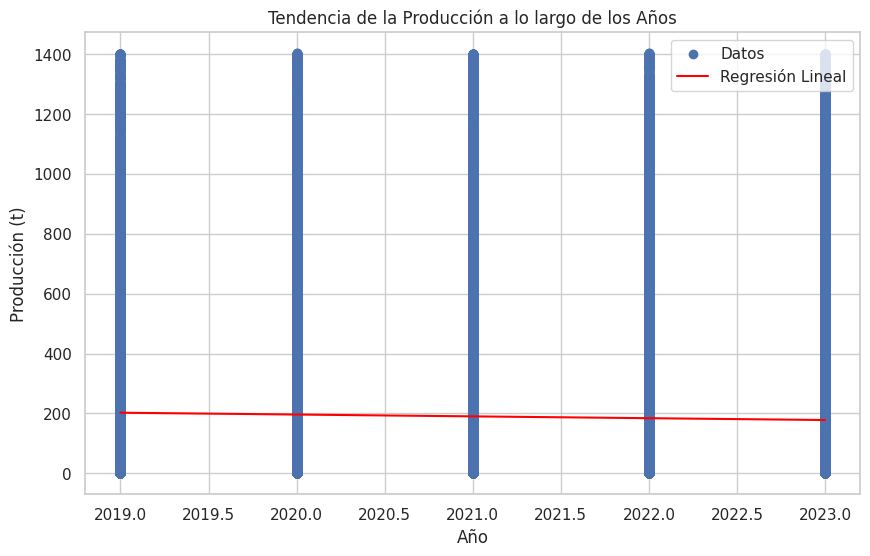

In [91]:
# Visualización de la tendencia
plt.figure(figsize=(10, 6))
plt.scatter(df['Año'], df['Producción (t)'], label='Datos')
plt.plot(df['Año'], regressor.predict(x), color='red', label='Regresión Lineal')
plt.xlabel('Año')
plt.ylabel('Producción (t)')
plt.title('Tendencia de la Producción a lo largo de los Años')
plt.legend()
plt.show()

In [92]:
# Reporte del error

print(f'Error cuadrático medio: {mean_squared_error(y_test, y_pred)}')

Error cuadrático medio: 74960.57968631867


In [93]:
# Definir X y y, incluyendo más variables
X = df[['Año', 'Área sembrada (ha)', 'Área cosechada (ha)', 'Rendimiento (t/ha)']]
y = df['Producción (t)']

In [94]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
# Ajustar el modelo de regresión lineal
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [101]:
# Predecir en el conjunto de prueba
y_pred = regressor.predict(X_test_scaled)

In [102]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio: {mse}')

Error cuadrático medio: 62173.3414659415


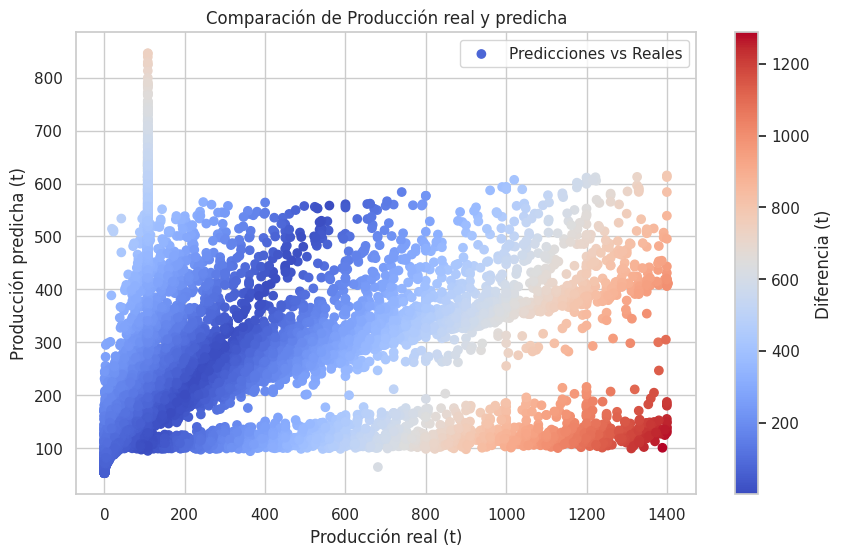

In [105]:
# Visualizar los resultados


# Crear un mapa de colores
plt.figure(figsize=(10, 6))

# Usar un colormap para diferenciar los puntos
sc = plt.scatter(y_test, y_pred, c=np.abs(y_test - y_pred), cmap='coolwarm', label='Predicciones vs Reales')

# Añadir barra de colores
plt.colorbar(sc, label='Diferencia (t)')

plt.xlabel('Producción real (t)')
plt.ylabel('Producción predicha (t)')
plt.title('Comparación de Producción real y predicha')
plt.legend()
plt.show()

In [106]:
# Crear nuevas variables de interacción
df['Interacción_Area_Rendimiento'] = df['Área sembrada (ha)'] * df['Rendimiento (t/ha)']

# Incluirla en el modelo
X = df[['Año', 'Área sembrada (ha)', 'Área cosechada (ha)', 'Rendimiento (t/ha)', 'Interacción_Area_Rendimiento']]


In [107]:
# Modelo Ridge con regularización
ridge = Ridge(alpha=1.0)  # Puedes ajustar el parámetro alpha
ridge.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Error cuadrático medio (Ridge): {mse_ridge}')


Error cuadrático medio (Ridge): 62173.34358248138


In [108]:
from sklearn.model_selection import cross_val_score

# Validación cruzada de 5 pliegues
cv_scores = cross_val_score(regressor, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Promedio de MSE
mean_mse = -cv_scores.mean()
print(f'Error cuadrático medio promedio (Validación cruzada): {mean_mse}')


Error cuadrático medio promedio (Validación cruzada): 63177.90794138158


In [109]:
# Definir los parámetros que queremos probar
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Inicializar GridSearchCV
grid_search = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)

# Ajustar el modelo
grid_search.fit(X_train_scaled, y_train)

# Ver el mejor parámetro y su resultado
print(f"Mejor parámetro: {grid_search.best_params_}")
print(f"Mejor MSE: {-grid_search.best_score_}")


Mejor parámetro: {'alpha': 10.0}
Mejor MSE: 63177.904338608336


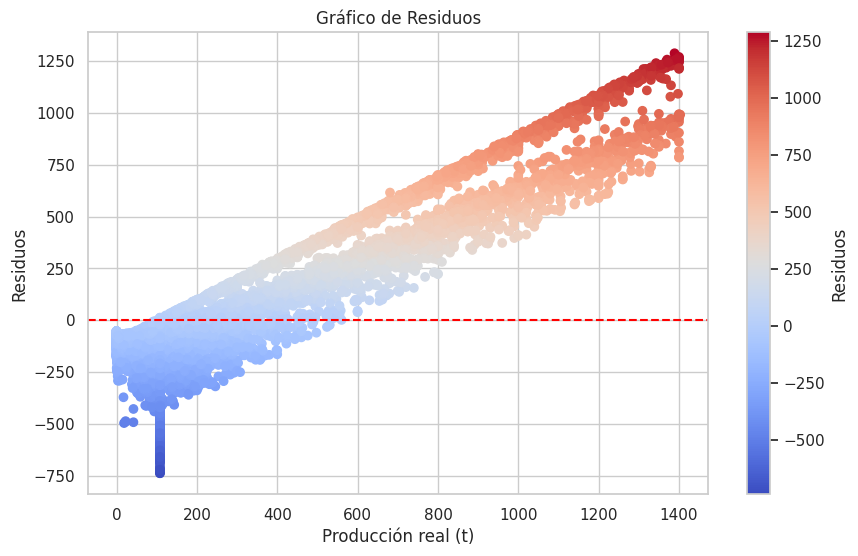

In [88]:
# Calcular los residuos

# Graficar residuos con un mapa de colores
plt.figure(figsize=(10, 6))

# Usar un colormap para los residuos
sc = plt.scatter(y_test, residuos, c=residuos, cmap='coolwarm')

# Añadir barra de colores
plt.colorbar(sc, label='Residuos')

# Añadir la línea horizontal en y=0
plt.axhline(0, color='red', linestyle='--')

# Etiquetas y título
plt.xlabel('Producción real (t)')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')

# Mostrar gráfico
plt.show()


Explicación:

- c=residuos: Los residuos son usados para determinar el color de cada punto.
- cmap='coolwarm': El colormap cambia de colores cálidos (rojo) a fríos (azul), lo que facilita la interpretación de los residuos más grandes y pequeños.
- plt.colorbar(sc, label='Residuos'): Añade una barra de colores que indica la magnitud de los residuos.